<a href="https://colab.research.google.com/github/VishalAmbavade/Contelligenz/blob/main/RFM_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install squarify

In [ ]:
import squarify

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  data.csv.zip
  inflating: data.csv                


In [ ]:
df = pd.read_csv('data.csv', encoding = 'unicode_escape')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
snapshot_date = df['InvoiceDate'].max() + timedelta(days = 1)
print(snapshot_date)

2011-12-10 12:50:00


In [ ]:
data_process = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})

In [ ]:
data_process.rename(columns = {'InvoiceDate':'Recency',
                               'InvoiceNo':'Frequency',
                               'TotalSum':'MonetaryValue'}, inplace = True)

In [ ]:
data_process.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4372 non-null   int64  
 1   Frequency      4372 non-null   int64  
 2   MonetaryValue  4372 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

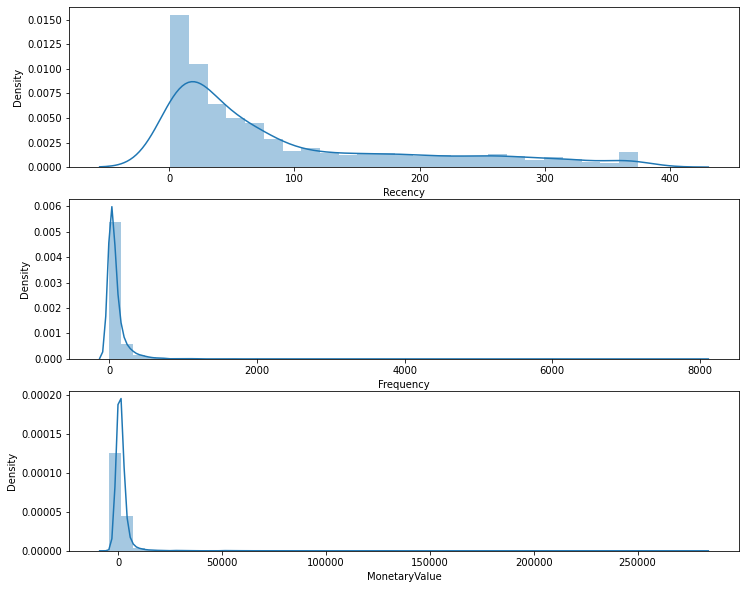

In [ ]:
plt.figure(figsize = (12, 10))

plt.subplot(3, 1, 1)
sns.distplot(data_process['Recency'])

plt.subplot(3, 1, 2)
sns.distplot(data_process['Frequency'])

plt.subplot(3, 1, 3)
sns.distplot(data_process['MonetaryValue'])

plt.show()

Calculating R and F groups

In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)

r_groups = pd.qcut(data_process['Recency'], q = 4, labels = r_labels)
f_groups = pd.qcut(data_process['Frequency'], q = 4, labels = f_labels)

data_process = data_process.assign(R = r_groups.values, F = f_groups.values)

data_process.head()

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,182,4310.00,4,4
12348.0,75,31,1797.24,2,2
12349.0,19,73,1757.55,3,3
12350.0,310,17,334.40,1,1


In [ ]:
m_labels = range(1, 5)
m_groups = pd.qcut(data_process['MonetaryValue'], q = 4, labels = m_labels)

data_process = data_process.assign(M = m_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [ ]:
def join_rfm(x):
  return str(x['R']) + str(x['F']) + str(x['M'])

data_process['RFM_Segment_Cocat'] = data_process.apply(join_rfm, axis = 1)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Cocat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [ ]:
rfm_count_unique = rfm.groupby('RFM_Segment_Cocat')['RFM_Segment_Cocat'].nunique()
print(rfm_count_unique.sum())

62


In [ ]:
rfm['RFM_score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
print(rfm['RFM_score'].head())

CustomerID
12346.0     3
12347.0    12
12348.0     8
12349.0    10
12350.0     4
Name: RFM_score, dtype: int64


In [ ]:
def rfm_level(x):
  if (x['RFM_score'] >= 9):
    return 'Can\'t loose them!!'
  elif ((x['RFM_score'] >= 8) and (x['RFM_score'] < 9)):
    return 'Champions'
  elif ((x['RFM_score'] >= 7) and (x['RFM_score'] < 8)):
    return 'Loyal'
  elif ((x['RFM_score'] >= 6) and (x['RFM_score'] < 7)):
    return 'Potential'
  elif ((x['RFM_score'] >= 5) and (x['RFM_score'] < 6)):
    return 'Promising'
  elif ((x['RFM_score'] >= 4) and (x['RFM_score'] < 5)):
    return 'Needs attention'
  else:
    return 'Require activation'

rfm['RFM_Level'] = rfm.apply(rfm_level, axis = 1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Cocat,RFM_score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Require activation
12347.0,2,182,4310.00,4,4,4,444,12,Can't loose them!!
12348.0,75,31,1797.24,2,2,4,224,8,Champions
12349.0,19,73,1757.55,3,3,4,334,10,Can't loose them!!
12350.0,310,17,334.40,1,1,2,112,4,Needs attention


In [ ]:
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't loose them!!    25.2     195.1        4130.3  1690
Champions             62.7      57.0         974.7   467
Loyal                 78.8      39.7         724.2   447
Needs attention      174.5      13.9         227.1   391
Potential             94.3      28.5         491.8   468
Promising            153.0      21.2         346.8   517
Require activation   264.8       7.8         109.1   392


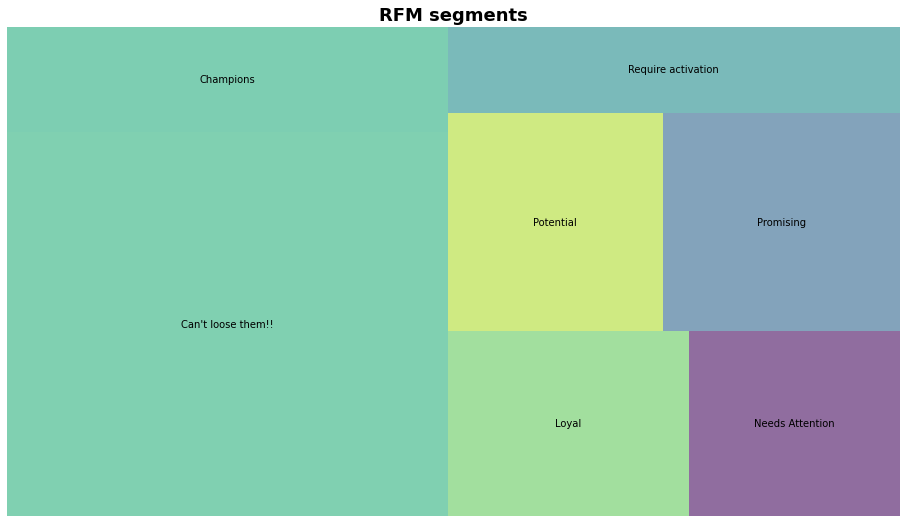

In [ ]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

squarify.plot(sizes = rfm_level_agg['Count'],
              label = ['Can\'t loose them!!',
                       'Champions',
                       'Loyal',
                       'Needs Attention',
                       'Potential',
                       'Promising',
                       'Require activation'], alpha = 0.6)

plt.title('RFM segments', fontsize = 18, fontweight = 'bold')
plt.axis('off')
plt.show()